## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# %matplotlib inline

## Importing the Data files

In [2]:
train_data = pd.read_csv("pendigits-tra.csv")
test_data = pd.read_csv("pendigits-tra.csv")

### Generating a loop that visualize the scatterplot for each feature we have, then we would create a heatmap in order to write a summary of what you noticed.

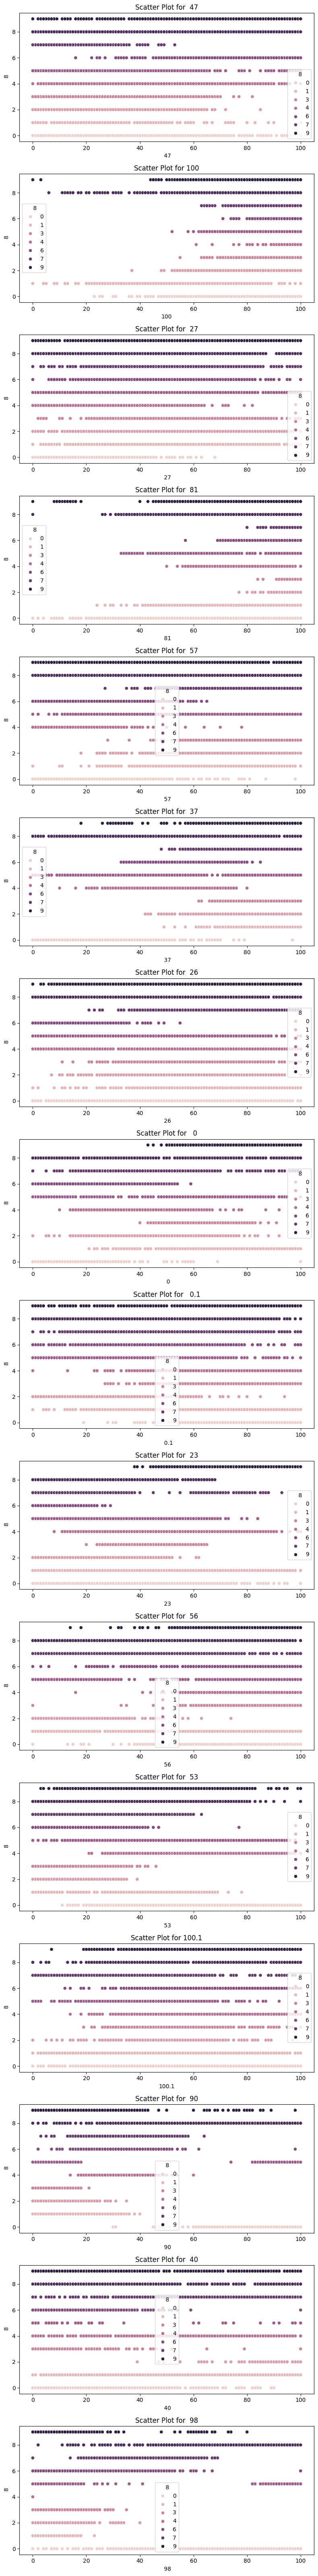

In [4]:
# Get the list of features
features = train_data.columns[:-1]

# Set up subplots with each feature having its own plot
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 4 * len(features)))

# Loop through each feature and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y=train_data.columns[-1], hue=train_data.columns[-1], data=train_data, ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {feature}')

plt.tight_layout()
plt.show()

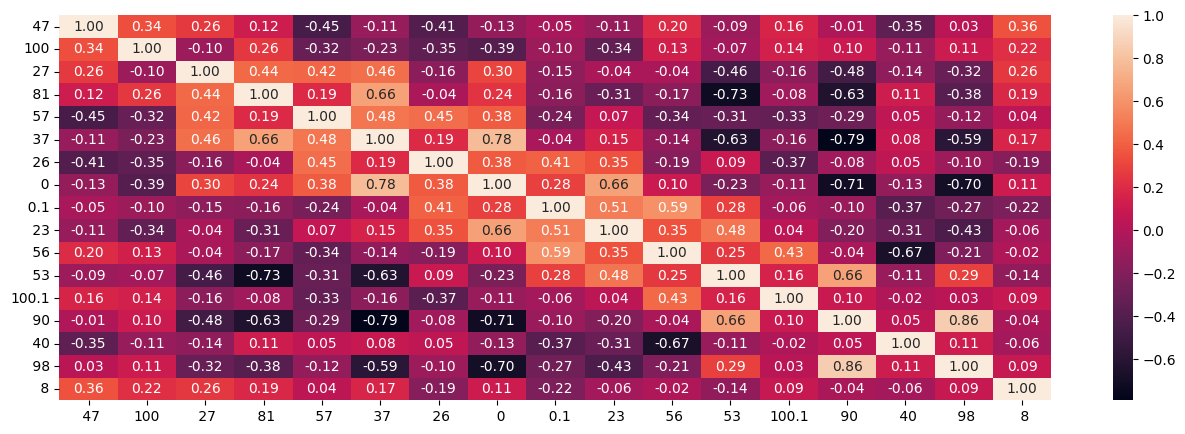

In [5]:
# Heatmap
corr = train_data.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()

In [6]:
# The two factors that have the highest effect on the target class
highest_corr_factors = corr.iloc[:, -1].abs().sort_values(ascending=False)[1:3]
print(highest_corr_factors)

 47    0.355593
 27    0.255431
Name:  8, dtype: float64


In [7]:
# Checking for redundancy
no_dub = train_data.drop_duplicates()
# Checking for empty data
no_null = train_data.dropna()

In [8]:
# Separating the data to both train and test datasets
x_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

x_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

## # Decision Tree

Accuracy : 93.1402642466302 %


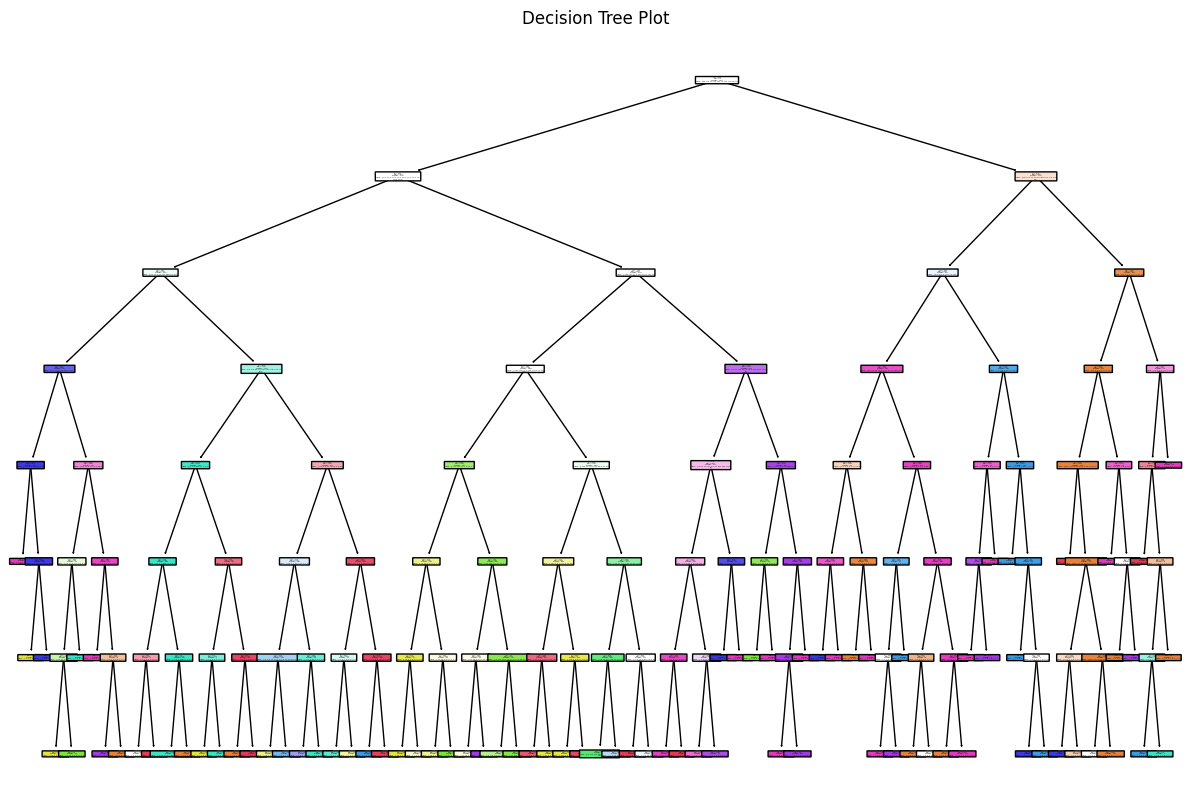

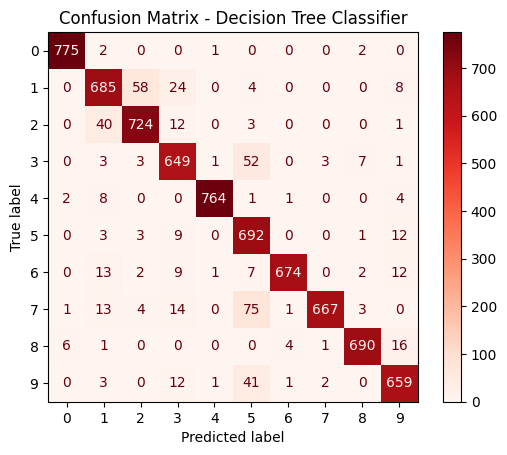

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state=42,max_depth=7)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {} %'.format(acc *100))

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=np.arange(1, 17), class_names=np.unique(y_train).astype(str), rounded=True)
plt.title("Decision Tree Plot")
plt.show()

#Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

#### When the tree depth wasn't assigned to it, the accuracy was 100% which can be a sign for a really good classifier. However, this also can be considered as a sign for overfitting the data. so, I pruned the depth of it to different values until i reached a resonable accuracy. In conclusion: Yes, Tree pruning enhances the accuracy of the decision tree strategy

## # Bagging

Accuracy of bagging with SVM: 99.7197 %



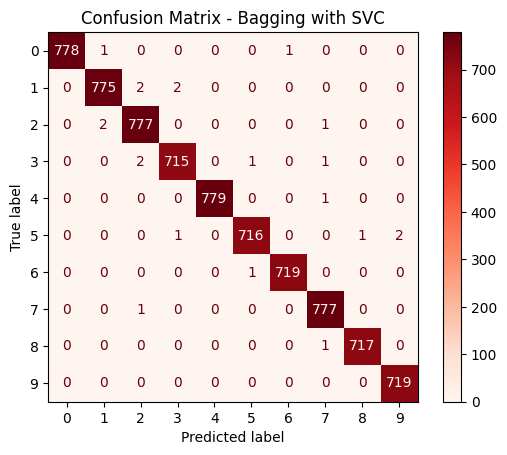

In [43]:
SVM = SVC(random_state = 91, probability=True)

# Bagging with SVM
bag_model = BaggingClassifier(estimator=SVM, n_estimators=10, random_state=42)  
bag_model.fit(x_train, y_train)
svm_pred = bag_model.predict(x_test)
acc_svm_bag = accuracy_score(y_test, svm_pred)

# Print the accuracy
print('Accuracy of bagging with SVM: {:.4f} %\n'.format(acc_svm_bag * 100))

# Create and display the confusion matrix
cm_svm_bag = confusion_matrix(y_test, svm_pred)
cm_svm_bag_display = ConfusionMatrixDisplay(cm_svm_bag, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Bagging with SVC")
plt.show()

Accuracy of bagging with DT: 95.4090 %



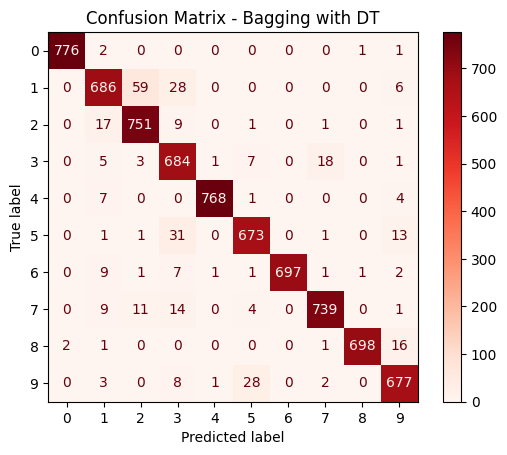

In [11]:
# Bagging with Decision_tree
bag_model_dt = BaggingClassifier(estimator=dt, n_estimators=10, random_state=42)  
bag_model_dt.fit(x_train, y_train)
dt_pred = bag_model_dt.predict(x_test)
acc_dt_bag = accuracy_score(y_test, dt_pred)

# Print the accuracy
print('Accuracy of bagging with DT: {:.4f} %\n'.format(acc_dt_bag * 100))

# Create and display the confusion matrix
cm_dt_bag = confusion_matrix(y_test, dt_pred)
cm_dt_bag_display = ConfusionMatrixDisplay(cm_dt_bag, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Bagging with DT")
plt.show()

Voting Classifier Accuracy : 96.049646 %



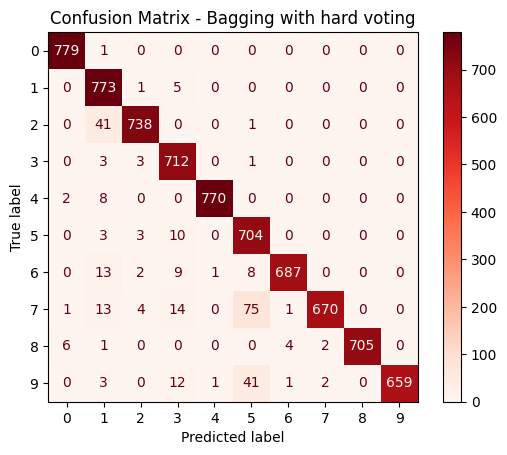

In [12]:
vo_clf = VotingClassifier(estimators=[('SVM', SVM), ('DecisionTree', dt)], voting='hard')
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)

# Print the accuracy
print('Voting Classifier Accuracy : {0:4f} %\n'.format(accuracy_score(y_test, pred)*100))

# Create and display the confusion matrix
cm_dt_bag = confusion_matrix(y_test, pred)
cm_dt_bag_display = ConfusionMatrixDisplay(cm_dt_bag, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Bagging with hard voting")
plt.show()

Voting Classifier Accuracy : 99.239290 %



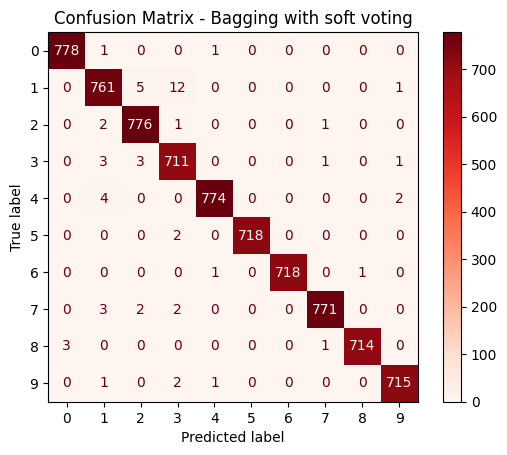

In [13]:
vo_clf = VotingClassifier(estimators=[('SVM', SVM), ('DecisionTree', dt)], voting='soft')
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)

# Print the accuracy
print('Voting Classifier Accuracy : {0:4f} %\n'.format(accuracy_score(y_test, pred)*100))

# Create and display the confusion matrix
cm_dt_bag = confusion_matrix(y_test, pred)
cm_dt_bag_display = ConfusionMatrixDisplay(cm_dt_bag, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Bagging with soft voting")
plt.show()

#### When I used hard voting it producted a less accurate model than the one with soft voting strategy. However, we need to keep in mind that soft clf consider the probability score assigned to the model which can take really long time in larger datasets and it is also the reason why we made the SVM model with (probability=True)

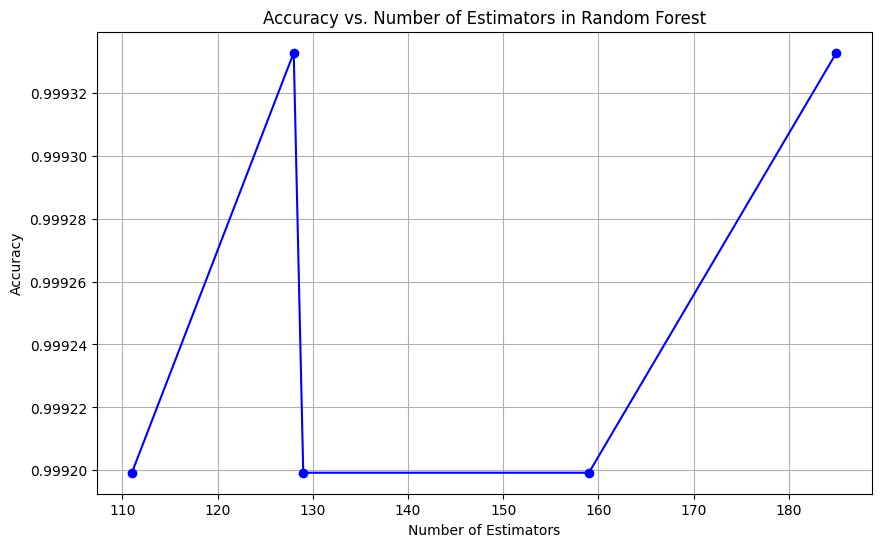

In [17]:
# Random Forest algorithm using 5 different values for the number of estimators
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
    
rf_clf.fit(x_train,y_train)

# Define a range of values for the number of estimators
n_estimators_values = np.random.randint(10, 201, size=5)

# Sorting the values in ascending order ensures that the plot graph progresses from left to right without any lines colliding.
n_estimators_values = np.sort(n_estimators_values)


# Initialize lists to store accuracy values
accuracies = []

for n_estimators in n_estimators_values:

    # Bagging with rf
    
    bag_model_rf = BaggingClassifier(estimator=rf_clf, n_estimators=n_estimators, random_state=42)  
    
    bag_model_rf.fit(x_train, y_train)
    
    rf_pred = bag_model_rf.predict(x_test)

    accuracy = accuracy_score(y_test,rf_pred)

    accuracies.append(accuracy)

# Plot accuracy vs. number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators in Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## # Boosting

Accuracy with best hyperparameters {'learning_rate': 0.28864454522695926, 'n_estimators': 183} is: 100.00%


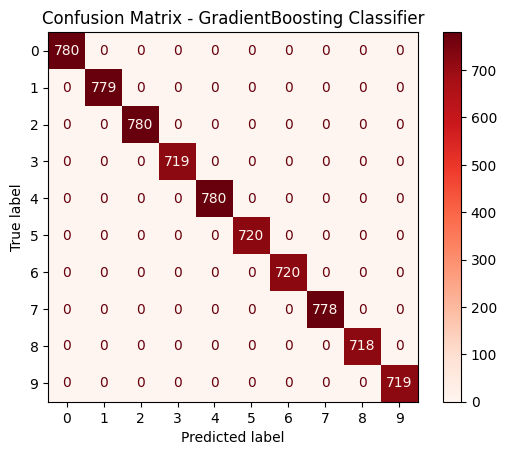

In [15]:
# Create GradientBoosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the combined parameter search space
param_space = {
    'n_estimators': np.random.randint(10, 201, size=4),
    'learning_rate': np.random.uniform(0.1, 0.9, size=4)
}

# Perform grid search
grid_search = GridSearchCV(gb_classifier, param_space, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_gb_classifier = GradientBoostingClassifier(**best_params)
final_gb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_gb = final_gb_classifier.predict(x_test)

# Evaluate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy with best hyperparameters {best_params} is: {accuracy_gb*100:.2f}%')

# Display confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
conf_matrix_gb_display = ConfusionMatrixDisplay(conf_matrix_gb, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - GradientBoosting Classifier")
plt.show()

Accuracy with best hyperparameters {'learning_rate': 0.28864454522695926, 'n_estimators': 183} is: 100.00%


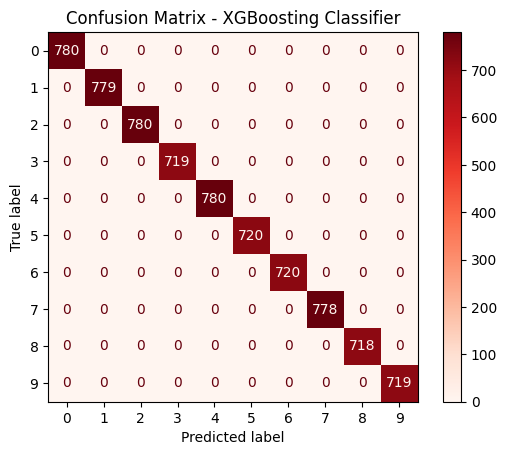

In [16]:
import xgboost as xgb
# Create XGboost classifier
xgb_classifier = xgb.XGBClassifier()

# Using the same best params as in the previous example
final_xgb_classifier = xgb.XGBClassifier(**best_params)
final_xgb_classifier.fit (x_train,y_train)

# Make predictions on the test set
y_pred_xgb = final_xgb_classifier.predict(x_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy with best hyperparameters {best_params} is: {accuracy_xgb*100:.2f}%')

# Display confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_xgb_display = ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - XGBoosting Classifier")
plt.show()

#### In the comparison between both bagging and boosting methods. The boosting method showed more accurate models which can be one of two reasons
#### 1. The boosting method was able to handle the dataset better as it is more suitable to complex/noisy dataset 
#### OR 
#### 2. Overfitting as in real world models getting a 100% accuracy is nearly impossible
#### Which can indicate that the bagging method is more reliable in terms of irl projects

## # Improving with PCA and Feature Selection:

In [36]:
# Importing the PCA and Feature selection tools
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Before we can use PCA we need to standarize the data we have in order to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

scaled_train = scaler.fit_transform(x_train)

scaled_test = scaler.transform(x_test)


In [44]:
# After applying the scaler to our train data we can select the features that has the highest impact on our model metrics
selector = SelectKBest(score_func=f_classif)
X_train_selected = selector.fit_transform(scaled_train, y_train)
X_test_selected = selector.transform(scaled_test)

In [45]:
# Applying the PCA
# We only apply PCA to feature variables to reduce their dimensionality and improve the computational efficiency of the models without affecting the target variable
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

Decision Tree Accuracy: 99.1192


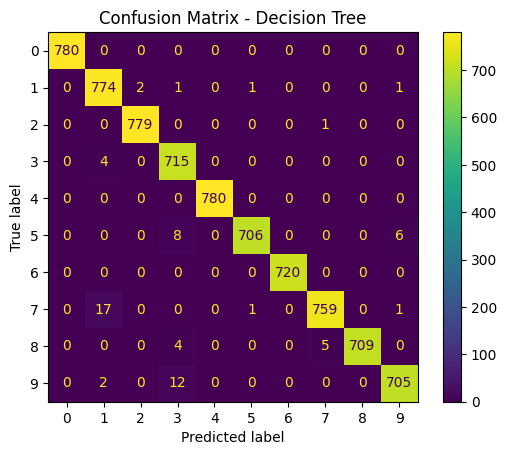

SVC Accuracy: 98.0515


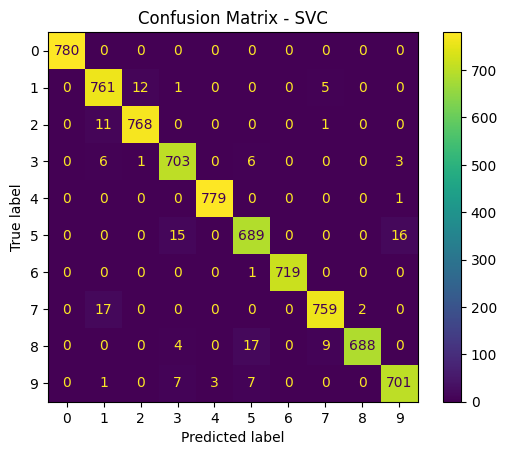

Random Forest Accuracy: 100.0000


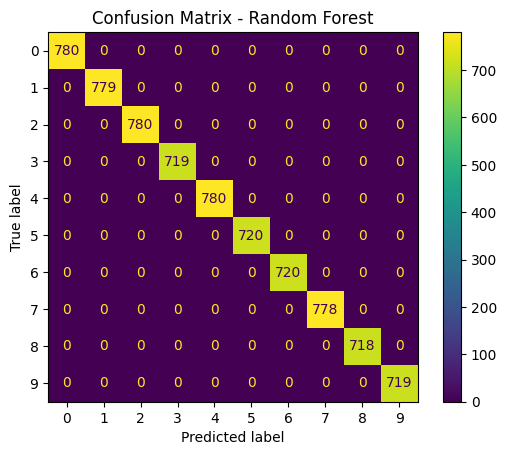

In [56]:
# Model Training and Evaluation
# I made a dictionary which will identify both the names and models i want to use
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42,max_depth=15),
    "SVC": SVC(random_state = 91, probability=True,C=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# I made a for loop that helps me with fetching the accuracy results of each model in a faster way rather than one after another model testing approach
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy*100:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

#### After adding the PCA and feature selection along with changing the parameters of some models. The models started to give us better precentages in terms of classification accuracy until we reached the random forest which gave us 100% which can indicated overfitting